# GitHub Link:
#### https://github.com/nehabaddam/Feature_Engineering

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [4]:
listen_count = pd.read_csv('C:/Users/badda/Downloads/train_triplets.txt.zip', header=None, delimiter='\t')
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [6]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

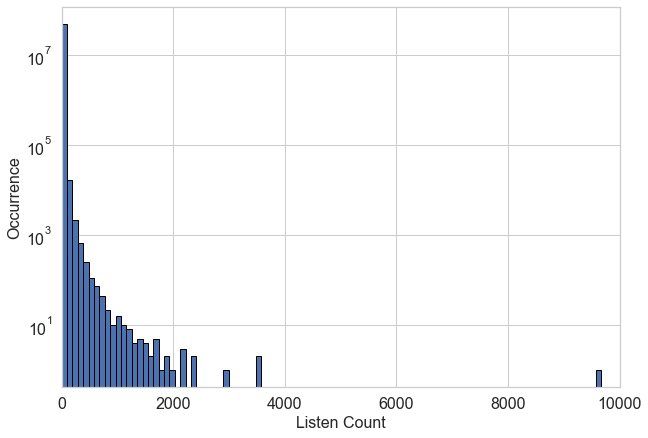

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Binarizer
import matplotlib.pyplot as plt

In [9]:
# write your code here
df = pd.read_excel("Athletes.xlsx")
df.head()


,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [10]:
df.dtypes

Name          object
NOC           object
Discipline    object
dtype: object

## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [11]:
# write you code here
df["NOC"] = df["NOC"].astype("category")
df["Discipline"] = df["Discipline"].astype("category")
df["NOC"]
df["NOC"].value_counts()

United States of America         615
Japan                            586
Australia                        470
People's Republic of China       401
Germany                          400
                                ... 
South Sudan                        2
Central African Republic           2
Saint Kitts and Nevis              2
St Vincent and the Grenadines      2
Mauritania                         2
Name: NOC, Length: 206, dtype: int64

In [12]:
#encoding 
encoder = LabelEncoder()
encoded_noc = encoder.fit_transform(df['NOC'])


In [13]:
#binerizing
binarizer = Binarizer()
binarized_noc = binarizer.fit_transform(encoded_noc.reshape(-1, 1))


In [14]:
# Count the number of athletes per country
athletes_per_country = pd.Series(binarized_noc.flatten()).value_counts()


C:\Users\badda\AppData\Local\Temp\ipykernel_31828\904768697.py:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


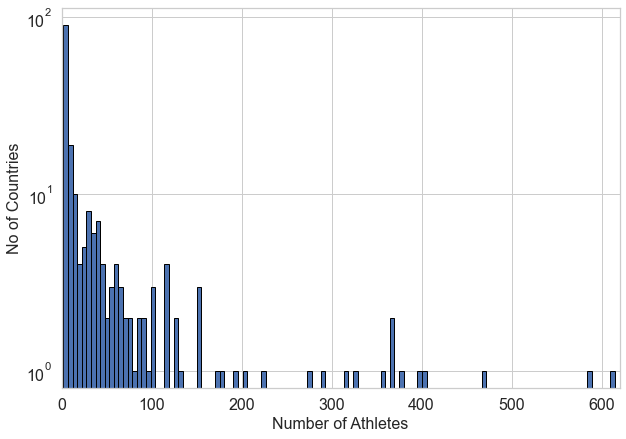

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(df["NOC"].value_counts(), bins = 120, edgecolor='black')
plt.yscale('log', nonposy='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,620])
_ = plt.xlabel('Number of Athletes', fontsize=16)
_ = plt.ylabel('No of Countries', fontsize=16)

## **(Tutorial) Quantizing data**

In [17]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([49, 47, 66, 97, 44, 55, 89,  3, 66, 22, 53, 18, 14, 77, 64, 85, 34,
       86, 88, 35])

In [18]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([4, 4, 6, 9, 4, 5, 8, 0, 6, 2, 5, 1, 1, 7, 6, 8, 3, 8, 8, 3],
      dtype=int32)

In [19]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [20]:
import json

In [21]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [22]:
biz_df = load_json_df('yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [23]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [24]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

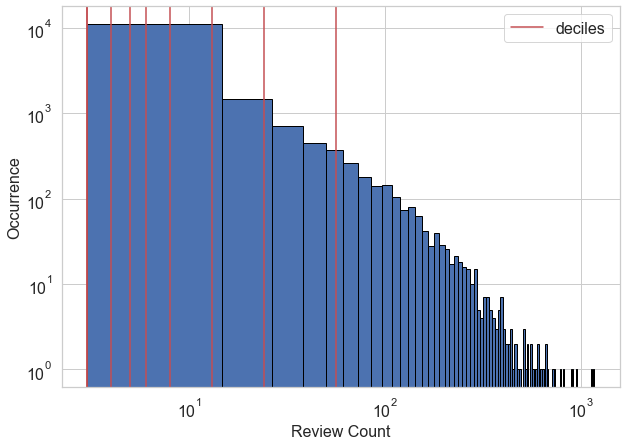

In [25]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

In [26]:
# write the code here
# Computing the quantiles of the number of athletes from each country
quantiles = df["NOC"].value_counts().quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
quantiles

0.1      3.0
0.2      4.0
0.3      5.0
0.4      7.0
0.5     10.0
0.6     23.0
0.7     39.5
0.8     67.0
0.9    142.5
Name: NOC, dtype: float64

C:\Users\badda\AppData\Local\Temp\ipykernel_31828\368127072.py:8: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', nonposy='clip')


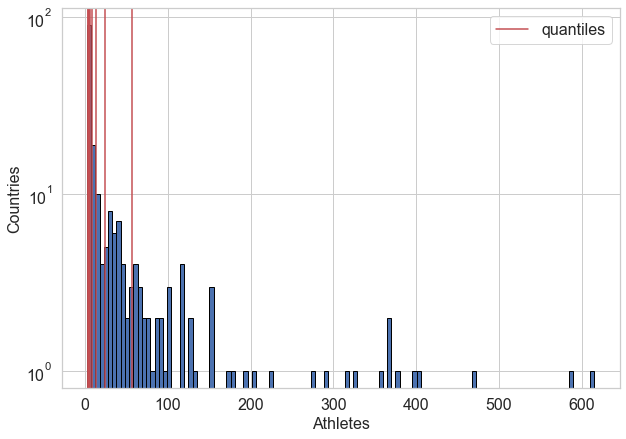

In [35]:
# visualizing the histogram (data was used in task 1)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df["NOC"].value_counts().hist(ax=ax, bins=120, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['quantiles'], fontsize=16) 
ax.set_yscale('log', nonposy='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Athletes', fontsize=16) 
_ = ax.set_ylabel('Countries', fontsize=16)

C:\Users\badda\AppData\Local\Temp\ipykernel_31828\160244757.py:8: MatplotlibDeprecationWarning: The 'nonposx' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale('log', nonposx='clip')
C:\Users\badda\AppData\Local\Temp\ipykernel_31828\160244757.py:9: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale('log', nonposy='clip')


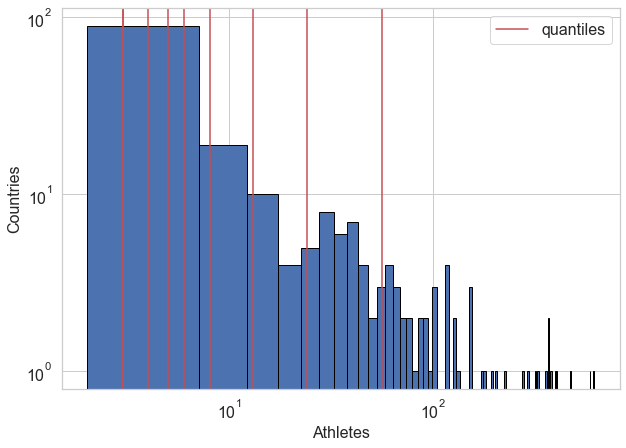

In [36]:
# Applying log transform on the number of athletes and visualizing the histogram again.
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
df["NOC"].value_counts().hist(ax=ax, bins=120, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['quantiles'], fontsize=16) 
ax.set_xscale('log', nonposx='clip')
ax.set_yscale('log', nonposy='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Athletes', fontsize=16) 
_ = ax.set_ylabel('Countries', fontsize=16)

## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: 
The histogram 1 and histogram 2 are slightly different. Histogram 2 has slightly reduced skewness. 

When applied to a skewed distribution with a long tail on one side, a log transform can help reduce the skewness. This is because the log transform compresses larger values more than smaller ones, pulling in the tail while spreading out the distribution's core region. As a result, the histogram of the modified data may appear more symmetrical after applying log transform to it.

We apply log transform on some data because of following reasons:
1. In a Skewed distributions, by applying log transform skewness is reduced.
2. For better visualisation, sometimes is important to compress wide ranges of values this can be done using log transform.
3. Relationships that multiply are linearized using log transform.

---


## **(Tutorial) Box-Cox transform**

In [37]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

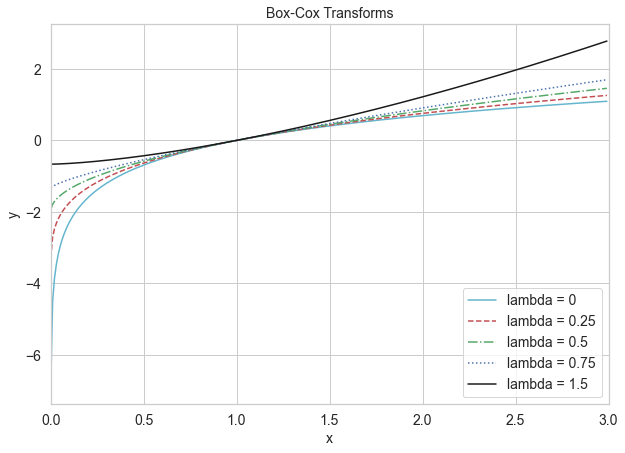

In [38]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [39]:
from scipy import stats

In [40]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

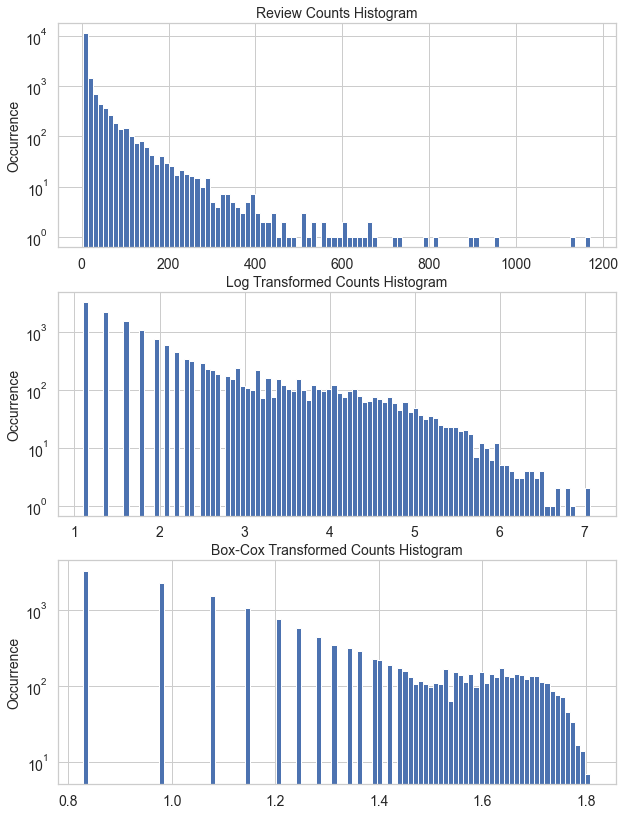

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

In [42]:
# write your code here
# Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers
df["NOC"].value_counts()

United States of America         615
Japan                            586
Australia                        470
People's Republic of China       401
Germany                          400
                                ... 
South Sudan                        2
Central African Republic           2
Saint Kitts and Nevis              2
St Vincent and the Grenadines      2
Mauritania                         2
Name: NOC, Length: 206, dtype: int64

In [43]:
# Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers
athletes = pd.DataFrame()
athletes["Country"] = df["NOC"].value_counts().index
athletes_list = []
for i in range(len(df["NOC"].value_counts())):
    a = df["NOC"].value_counts()[i]
    athletes_list.append(a)
athletes["Count"] = athletes_list
athletes

,Country,Count
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400
...,...,...
201,South Sudan,2
202,Central African Republic,2
203,Saint Kitts and Nevis,2
204,St Vincent and the Grenadines,2


In [44]:
# log transforming and box-cox transforming
athletes_log = stats.boxcox(athletes["Count"], lmbda=0)
athletes_boxcox, boxcox_params = stats.boxcox(athletes["Count"])
athletes['athletes_boxcox'] = athletes_boxcox
athletes['athletes_log'] = athletes_log
athletes

,Country,Count,athletes_boxcox,athletes_log
0,United States of America,615,3.541425,6.421622
1,Japan,586,3.528677,6.373320
2,Australia,470,3.468800,6.152733
3,People's Republic of China,401,3.423968,5.993961
4,Germany,400,3.423251,5.991465
...,...,...,...,...
201,South Sudan,2,0.645449,0.693147
202,Central African Republic,2,0.645449,0.693147
203,Saint Kitts and Nevis,2,0.645449,0.693147
204,St Vincent and the Grenadines,2,0.645449,0.693147


C:\Users\badda\AppData\Local\Temp\ipykernel_31828\265878914.py:5: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax1.set_yscale('log', nonposy='clip')
C:\Users\badda\AppData\Local\Temp\ipykernel_31828\265878914.py:14: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax2.set_yscale('log', nonposy='clip')
C:\Users\badda\AppData\Local\Temp\ipykernel_31828\265878914.py:21: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax3.set_yscale('log', nonposy='clip')


Text(0, 0.5, 'Occurrence')

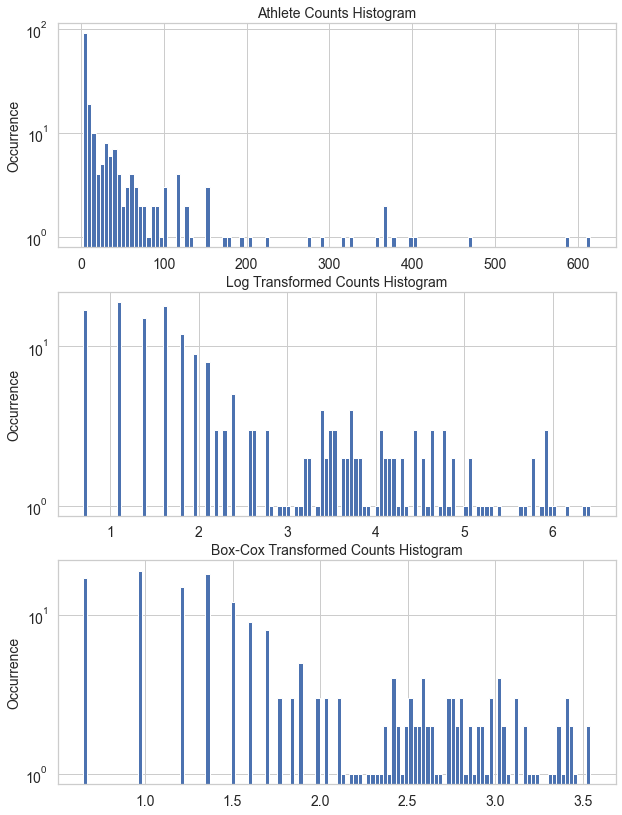

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))


athletes["Count"].hist(ax=ax1, bins=120)
ax1.set_yscale('log', nonposy='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Athlete Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)



athletes['athletes_log'].hist(ax=ax2, bins=120)
ax2.set_yscale('log', nonposy='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

athletes['athletes_boxcox'].hist(ax=ax3, bins=120)
ax3.set_yscale('log', nonposy='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:**

Square Root transform : Using this method, the variable is replaced with its square root. 

When to use:
1. When the data is skewed to right, it can reduce the skewness and make it more symmetric. 
2. It stabilises the variance, which is especially significant when the data contains large values or outliers.

Reciprocal Transformation:Using this method, the variable is replaced with its inverse.

When to use:
1. When it is required to compress the range of values or cope with data containing outliers or large numbers.
2. When the data is skewed to right, it can reduce the skewness and make it more symmetric. 


Yeo Johnson transform : The Box-Cox extension Yeo-Johnson transform can handle both positive and negative input data with greater flexibility in dealing with a broader range of data.

When to use:
1. When working with data that has both positive and negative values.
2. When the original data has skewness in both directions.




---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [50]:
import sklearn.preprocessing as preproc

In [51]:
news_df = pd.read_csv('OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [52]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [53]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [54]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 39.49999999999994, 'L2-normalized word count')

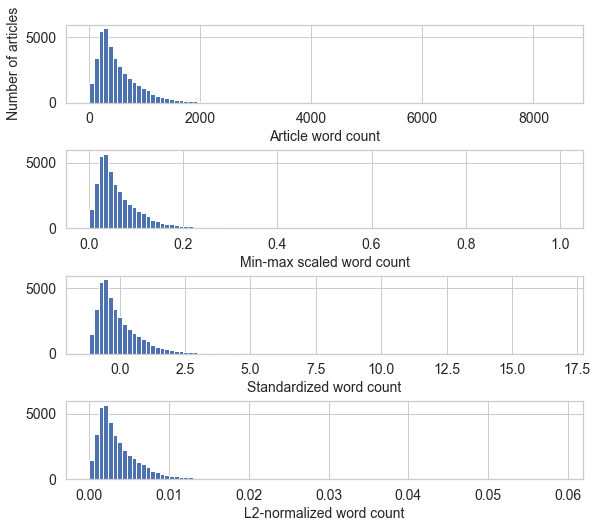

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

In [46]:
# write your code here

import sklearn.preprocessing as preproc
from scipy import stats

# Min-max scaling
athletes['minmax'] = preproc.minmax_scale(athletes[["Count"]])
athletes['minmax'].values

# Standardization
athletes['standardized'] = preproc.StandardScaler().fit_transform(athletes[['Count']])
athletes['standardized'].values

# L2-normalization
athletes['l2_normalized'] = preproc.normalize(athletes[['Count']], axis=0)
athletes['l2_normalized'].values

array([0.37287214, 0.35528955, 0.28495919, 0.24312476, 0.24251846,
       0.22857365, 0.22311699, 0.22190439, 0.21584143, 0.19643995,
       0.19280218, 0.17643218, 0.16612515, 0.13520404, 0.12247182,
       0.11822775, 0.10913331, 0.10367664, 0.0939759 , 0.0939759 ,
       0.09215702, 0.08063739, 0.0782122 , 0.07578702, 0.07093665,
       0.07093665, 0.07033035, 0.06972406, 0.0630548 , 0.0624485 ,
       0.06184221, 0.06002332, 0.05577925, 0.05577925, 0.05153517,
       0.05153517, 0.05032258, 0.0472911 , 0.04547221, 0.04365332,
       0.04183443, 0.04062184, 0.04001555, 0.03880295, 0.03819666,
       0.03698407, 0.03637777, 0.03577147, 0.03455888, 0.03455888,
       0.03395258, 0.0309211 , 0.02910222, 0.02788962, 0.02728333,
       0.02607073, 0.02607073, 0.02546444, 0.02485814, 0.02485814,
       0.02485814, 0.02425185, 0.02364555, 0.02303925, 0.02243296,
       0.02122037, 0.02122037, 0.02122037, 0.02000777, 0.02000777,
       0.01940148, 0.01879518, 0.01879518, 0.01758259, 0.01758

Text(0.5, 39.49999999999994, 'L2-normalized Athlete Count')

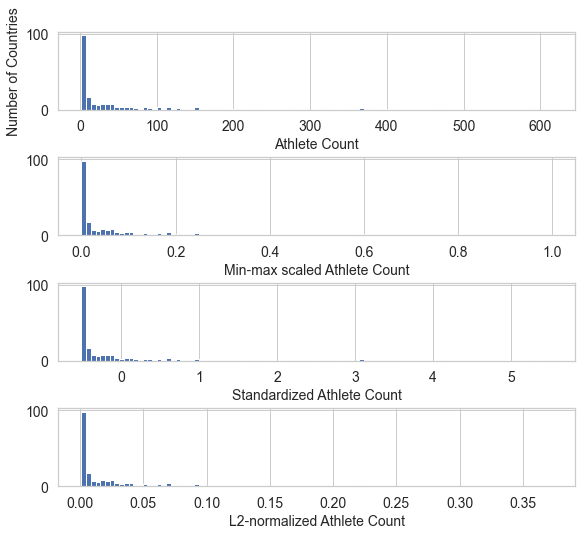

In [47]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

athletes['Count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Athlete Count', fontsize=14)
ax1.set_ylabel('Number of Countries', fontsize=14)

athletes['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled Athlete Count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

athletes['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized Athlete Count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

athletes['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized Athlete Count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: 


Similarities:
1. The way the graphs look are similar. 
2. The data distribution and the pattern of data is same in all the four graphs.

Differences:
1. The four graphs are different, the first one shows the originl data. The second histogram is Min-Max Scaled. The third histogram is Standardized. The fourth graph is L2-normalized. 
2. The ranges in all the four graphs are different. For original data the range is 0-600. The second histogram is Min-Max Scaled with range 0-1. The third histogram is Standardized with range 0-5. The fourth graph is L2-normalized with range 0.35. 





---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** 

Comparing feature scaling and transformation histograms:

1. The basic purpose of feature scaling is to prevent features with larger value ranges, it allows comparison and balancing of diverse features.

2. Transforms can be used to change a distribution's symmetry, remove skewness, linearize relationships, and manage uncommon data features.

3. Transformed data histograms may differ in shape from the original data due to the impact of the chosen transformation.

4. Feature scaling has a significant impact on the range or scale of values, whereas transformations can significantly modify the shape, symmetry, skewness, or relationship between variables in the data.


---


## Example of interaction features in prediction

In [56]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [57]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [58]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [59]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [60]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [61]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [62]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113287972


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [63]:
# write your code here
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
from sklearn.preprocessing import OrdinalEncoder

In [64]:
data_df = pd.read_excel("Dry_Bean_Dataset.xlsx")
data_df.head()
data_df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [65]:
data_df["Class"] = data_df["Class"].astype("category")
data_df.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
EquivDiameter       float64
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
Class              category
dtype: object

In [66]:
data_df["Class"].unique()
ord_enc = OrdinalEncoder()
data_df["Class"] = ord_enc.fit_transform(data_df[["Class"]])
data_df["Class"].unique()

array([5., 0., 1., 2., 4., 6., 3.])

In [67]:
X = data_df.loc[:,data_df.columns != 'Class']
y = data_df["Class"]

In [68]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [69]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a logistic regression model on the training set and score on the test set"""
    model = linear_model.LogisticRegression(max_iter=1000).fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [70]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("Accuracy score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("Accuracy score with interaction features: %0.5f" % r2)

C:\Users\badda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score with singleton features: 0.87463
Accuracy score with interaction features: 0.82738


C:\Users\badda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Another Way to do it

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Step 2: Load the dataset
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

# Step 3: Encode categorical data
# Assuming the last column 'class' is categorical
data['Class'] = pd.Categorical(data['Class']).codes

# Step 4: Apply interaction features
# Example: Create interaction features by multiplying 'area' and 'perimeter'
data['interaction_feature'] = data['Area'] * data['Perimeter']

# Step 5: Train regression models
# Split the dataset into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression models using singleton features
singleton_model = LinearRegression()
singleton_model.fit(X_train, y_train)
y_pred_singleton = singleton_model.predict(X_test)

# Train regression models using interaction features
interaction_model = LinearRegression()
interaction_model.fit(X_train[['interaction_feature']], y_train)
y_pred_interaction = interaction_model.predict(X_test[['interaction_feature']])

# Step 6: Evaluate R-squared scores
r2_singleton = r2_score(y_test, y_pred_singleton)
r2_interaction = r2_score(y_test, y_pred_interaction)

# Step 7: Compare the R-squared scores
print("R-squared score - Singleton features:", r2_singleton)
print("R-squared score - Interaction features:", r2_interaction)


R-squared score - Singleton features: 0.58745875610327
R-squared score - Interaction features: 0.21299228318521535
